# Notebook analyzing WhatsApp Group Chat Data

In [70]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

# NLTK stopwords download
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andilejaden/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load and clean the data

In [71]:
df = pd.read_csv('datasets/python_byo_chat_log.csv')

In [72]:
# Strip any leading/trailing spaces from the column headers
df.columns = df.columns.str.strip()

In [73]:
# Clean the 'Date' column by stripping spaces
df['Date'] = df['Date'].str.strip()

In [74]:
# Convert 'Date' and 'Time' columns to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'].str.strip(), format='%H:%M:%S', errors='coerce').dt.time

In [75]:
# Drop rows with NaT in 'Date' or NaT in 'Time'
df.dropna(subset=['Date', 'Time'], inplace=True)

# 1. Top 10 participants in the group

In [76]:
top_participants = df['Sender'].value_counts().head(10)
print("Top 10 Participants:")
print(top_participants)

Top 10 Participants:
Sender
Vuyisile                               166
Mpumelelo Mpumi Nyathi                 158
~ Pickã-Čhu                            114
~ Us3r                                  71
~ cypher                                57
Tyrone                                  56
~ VNDM                                  43
~ 🇻​🇪​🇷​🇪​🇳​🇸​🇰​🇾​                      41
Methembe Tshuma                         41
Henry Ndou                              37
Name: count, dtype: int64


## 2. Day with the most activity

In [77]:
most_active_day = df['Date'].value_counts().idxmax()
print("\nDay with the most activity:", most_active_day.date())


Day with the most activity: 2023-12-27


## 3. Most active time during the day

In [78]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)
most_active_time = df['Hour'].value_counts().idxmax()
print("\nMost active time during the day:", most_active_time, ":00")


Most active time during the day: 18 :00


## 4. Commonly used words

In [79]:
stop_words = set(stopwords.words('english'))
def preprocess_message(message):
    message = re.sub(r'[^\w\s]', '', message).lower()
    return message

## Combining all messages into a single string

In [80]:
all_messages = ' '.join(df['Message'].apply(preprocess_message))

In [81]:
# Tokenizing the string into words. Magic happens here!
words = all_messages.split()

In [82]:
# Removing stopwords
words = [word for word in words if word not in stop_words]

In [83]:
# Counting the frequency of each word using built-in Counter for efficiency
word_freq = Counter(words)

# Get the 20 most common words. You can filter out some words if needed e.g. yes, no, ok, etc.
most_common_words = word_freq.most_common(20)
print("\nMost Commonly Used Words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Most Commonly Used Words:
using: 67
use: 61
like: 58
linux: 47
link: 43
cloud: 41
would: 40
im: 39
one: 39
good: 36
groups: 36
dont: 35
yes: 34
think: 33
thats: 33
get: 33
need: 33
l: 33
invite: 30
go: 29


## Top 10 participants

/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127483 (\N{REGIONAL INDICATOR SYMBOL LETTER V}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/W

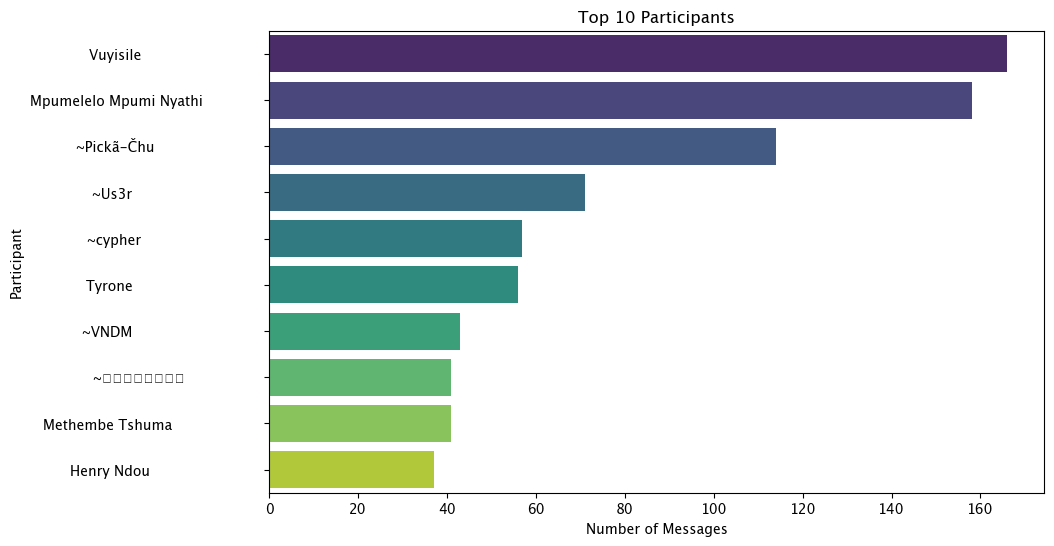

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_participants.values, y=top_participants.index, palette='viridis', hue=top_participants.index)
plt.title('Top 10 Participants')
plt.xlabel('Number of Messages')
plt.ylabel('Participant')
plt.show()

## Message count by hour

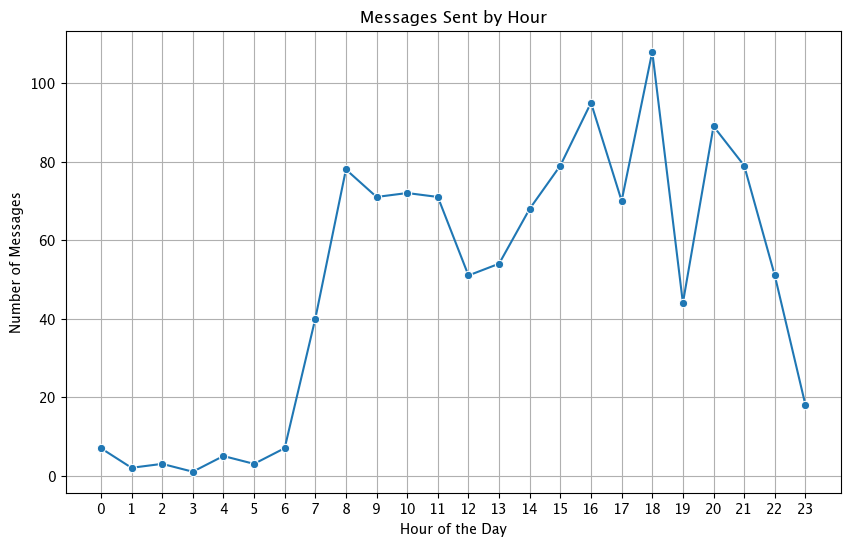

In [85]:
hourly_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Messages Sent by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## Generate a word cloud

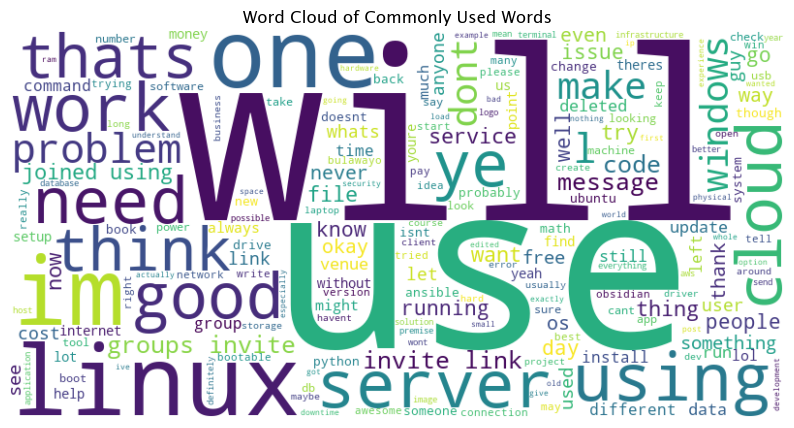

In [86]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Commonly Used Words')
plt.show()